<a href="https://colab.research.google.com/github/0lucasmoura/TreinamentoHackathonIA2020/blob/master/Aula_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ferramentas para analise e visualização de dados

Importando ferramentas!

In [0]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

#### NUMPY



NumPy é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. 

In [0]:
print(np.__doc__) 

Estruturas básicas:

In [0]:
lista = [1,2,3]
lista_R2 = [[1,2,3]]
lista_R3 =[[[1,2,3]]]

In [0]:
print(np.array(lista))
print(np.array(lista).shape)

[1 2 3]
(3,)


In [0]:
print(np.array(lista_R2))
print(np.array(lista_R2).shape)

[[1 2 3]]
(1, 3)


In [0]:
print(np.array(lista_R3))
print(np.array(lista_R3).shape)

[[[1 2 3]]]
(1, 1, 3)


Numpy arrays possuem tipagem!

In [0]:
np.array([1,2,3]).dtype

dtype('int64')

In [0]:
np.array([1.,2.,3.]).dtype

dtype('float64')

In [0]:
np.array([1,2,3], np.int32).dtype

dtype('int32')

In [0]:
my_int32_arr = np.array([1,2,3], np.int32)

# stack overflow example
# sub 1 to get max int32 val
my_int32_arr[0] = 2**31

print(my_int32_arr)
print(my_int32_arr.dtype)

[-2147483648           2           3]
int32


In [76]:
my_int32_arr[0] = 'A'

ValueError: ignored

In [77]:
my_int32_arr[0] = '12'
print(my_int32_arr)

[12  2  3]


Devido a essa implementação em  mais baixo nivel, operações utilizando numpy arrays são, no geral, mais eficientes que utilizando estruturas nativas do python.

In [0]:
import timeit

In [0]:
lista = list(np.linspace(0,1000, 200))
array = np.linspace(0, 1000, 200)

In [80]:
print(lista[:5])
print(array[:5])

[0.0, 5.025125628140704, 10.050251256281408, 15.075376884422113, 20.100502512562816]
[ 0.          5.02512563 10.05025126 15.07537688 20.10050251]


In [81]:
timeit.timeit('np.mean(lista)', globals={'np':np, 'lista':lista})

25.715404355999453

In [82]:
timeit.timeit('np.mean(array)', globals={'np':np, 'array':array})

6.65912038299939

Exemplo pratico

In [0]:
# Faça uma função que padronize a lista declarada abaixo utilizando python puro
lista = list(np.linspace(0,1000, 200))
from statistics import stdev, mean

def standartize_pure_python(lista):
  new_lista = []
  std_ = stdev(lista)
  mean_ = mean(lista)
  for item in lista:
    new_lista.append((item - mean_)/std_)
  return new_lista


def standartize_vectorized(lista):
  array = np.array(lista)
  return (array - np.mean(array)) / np.std(array)

In [0]:
z_lista = standartize_pure_python(lista)
z_array = standartize_vectorized(lista)

In [112]:
assert (z_lista == z_array).all()

AssertionError: ignored

In [0]:
from scipy import stats

In [111]:
assert (stats.zscore(lista) == z_array).all()
assert (stats.zscore(lista) == z_lista).all()

AssertionError: ignored

Testes de eficiencia

In [123]:
print("Padronizar com python puro: "
      f"{timeit.timeit('standartize_pure_python(lista)', globals={'lista': lista, 'standartize_pure_python': standartize_pure_python}, number=10000)}")
print("Padronizar com numpy: "
      f"{timeit.timeit('standartize_vectorized(lista)', globals={'lista': lista, 'standartize_vectorized': standartize_vectorized}, number=10000)}")
print(Padronizar usando scipy: "
      f"{timeit.timeit('zscore(lista)', globals={'lista': lista, 'zscore': stats.zscore}, number=10000)}")

Padronizar com python puro: 16.903321310000138
Padronizar com numpy: 0.533325603000776
Padronizar usando scipy: 0.7283917669992661


#### SCIPY

Implementa diversos algoritmos bastante úteis para diversas aplicações em engenharia, ciencia e matemática!

Feito em python e construido em cima do numpy!!

#### PANDAS

 pandas é uma ferramenta performatica, facil, poderosa e flexivel construída em cima do python e numpy. 

 Suas estruturas principais são as Series e os DataFrames.

 Utilizamos pandas a todo momento para manipulação de qualquer dado, desde textos a inclusive imagens.

 Sua flexibilidade é tãão grande que frameworks de machine learning e outros conseguem aceitar como input suas estruturas de dados.

 O nosso objetivo no momento éé o de utilizar pandas para a anáálise exploratoria dos dados e para limpeza dos mesmos.

 O preparo dos dados éé uma das partes mais importantes da modelagem para modelos de machine learning.

In [0]:
# primeiramente vamos carregar o csv que esta no workspace
# Dataset retirado do kaggle: https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

**wsid:**
Weather station id

**wsnm:**
Name station (usually city location or nickname)

**elvt:**
Elevation

**lat:**
Latitude

**lon:**
Longitude

**inme:**
Station number (INMET number) for the location

**city:**
City

**prov:**
State (Province)

**mdct:**
Observation Datetime (complete date: date + time)

**date:**
Date of observation

**yr:**
The year (2000-2016)

**mo:**
The month (0-12)

**da:**
The day (0-31)

**hr:**
The hour (0-23)

**prcp:**
Amount of precipitation in millimetres (last hour)

**stp:**
Air pressure for the hour in hPa to tenths (instant)

**smax:**
Maximum air pressure for the last hour in hPa to tenths

**smin:**
Minimum air pressure for the last hour in hPa to tenths

**gbrd:**
Solar radiation KJ/m2

**temp:**
Air temperature (instant) in celsius degrees

**dewp:**
Dew point temperature (instant) in celsius degrees

**tmax:**
Maximum temperature for the last hour in celsius degrees

**dmax:**
Maximum dew point temperature for the last hour in celsius degrees

**tmin:**
Minimum temperature for the last hour in celsius degrees

**dmin:**
Minimum dew point temperature for the last hour in celsius degrees

**hmdy:**
Relative humid in % (instant)

**hmax:**
Maximum relative humid temperature for the last hour in %

**hmin:**
Minimum relative humid temperature for the last hour in %

**wdsp:**
Wind speed in metres per second

**wdct:**
Wind direction in radius degrees (0-360)

**gust:**
Wind gust in metres per second

In [0]:
df = pd.read_csv('dataset/dataset_INMET_sudeste_1000.csv')

In [165]:
# checar 5 primeiras entradas/observações do dataframe
df.head()

,Unnamed: 0,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [0]:
# Aparentemente a coluna 0 deveria ser a coluna de index
df = pd.read_csv('dataset/dataset_INMET_5estacao.csv', index_col=0)

In [188]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [189]:
# checar tipos e colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16329 entries, 0 to 16328
Data columns (total 31 columns):
wsid    16329 non-null int64
wsnm    16329 non-null object
elvt    16329 non-null float64
lat     16329 non-null float64
lon     16329 non-null float64
inme    16329 non-null object
city    16329 non-null object
prov    16329 non-null object
mdct    16329 non-null object
date    16329 non-null object
yr      16329 non-null int64
mo      16329 non-null int64
da      16329 non-null int64
hr      16329 non-null int64
prcp    7317 non-null float64
stp     16328 non-null float64
smax    16328 non-null float64
smin    16328 non-null float64
gbrd    9520 non-null float64
temp    16328 non-null float64
dewp    16328 non-null float64
tmax    16328 non-null float64
dmax    16328 non-null float64
tmin    16328 non-null float64
dmin    16328 non-null float64
hmdy    16328 non-null float64
hmax    16328 non-null float64
hmin    16328 non-null float64
wdsp    15211 non-null float64
wdct    16

In [190]:
df.isna().sum()

wsid       0
wsnm       0
elvt       0
lat        0
lon        0
inme       0
city       0
prov       0
mdct       0
date       0
yr         0
mo         0
da         0
hr         0
prcp    9012
stp        1
smax       1
smin       1
gbrd    6809
temp       1
dewp       1
tmax       1
dmax       1
tmin       1
dmin       1
hmdy       1
hmax       1
hmin       1
wdsp    1118
wdct       1
gust     229
dtype: int64

In [0]:
df1 = df.drop(columns=['date', 'yr', 'mo', 'da', 'hr']) # ou adicionar a flag inplace=True

In [192]:
df1.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [193]:
# todas do rio de janeiro
df1.prov.unique()

array(['RJ'], dtype=object)

In [194]:
# e da estacao de sao goncalo
df1.wsnm.unique()

array(['SÃO GONÇALO'], dtype=object)

In [195]:
df1.wsid.unique()

array([178])

In [196]:
df1.elvt.unique()

array([237.])

In [197]:
df1.lat.unique()

array([-6.835777])

In [0]:
# por conta disso irei removar informacoes sobre o id elevacao e latidude
df1.drop(columns=['wsid', 'wsnm', 'elvt', 'lat', 'lon'], inplace=True)

In [199]:
df1.head()

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,A333,São Gonçalo,RJ,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,A333,São Gonçalo,RJ,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,A333,São Gonçalo,RJ,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,A333,São Gonçalo,RJ,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,A333,São Gonçalo,RJ,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [200]:
df1.isna().sum()

inme       0
city       0
prov       0
mdct       0
prcp    9012
stp        1
smax       1
smin       1
gbrd    6809
temp       1
dewp       1
tmax       1
dmax       1
tmin       1
dmin       1
hmdy       1
hmax       1
hmin       1
wdsp    1118
wdct       1
gust     229
dtype: int64

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16329 entries, 0 to 16328
Data columns (total 21 columns):
inme    16329 non-null object
city    16329 non-null object
prov    16329 non-null object
mdct    16329 non-null object
prcp    7317 non-null float64
stp     16328 non-null float64
smax    16328 non-null float64
smin    16328 non-null float64
gbrd    9520 non-null float64
temp    16328 non-null float64
dewp    16328 non-null float64
tmax    16328 non-null float64
dmax    16328 non-null float64
tmin    16328 non-null float64
dmin    16328 non-null float64
hmdy    16328 non-null float64
hmax    16328 non-null float64
hmin    16328 non-null float64
wdsp    15211 non-null float64
wdct    16328 non-null float64
gust    16100 non-null float64
dtypes: float64(17), object(4)
memory usage: 2.7+ MB


In [0]:
df1.inme = df1.inme.astype('category')
df1.city = df1.city.astype('category')
df1.prov = df1.prov.astype('category')

In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16329 entries, 0 to 16328
Data columns (total 21 columns):
inme    16329 non-null category
city    16329 non-null category
prov    16329 non-null category
mdct    16329 non-null object
prcp    7317 non-null float64
stp     16328 non-null float64
smax    16328 non-null float64
smin    16328 non-null float64
gbrd    9520 non-null float64
temp    16328 non-null float64
dewp    16328 non-null float64
tmax    16328 non-null float64
dmax    16328 non-null float64
tmin    16328 non-null float64
dmin    16328 non-null float64
hmdy    16328 non-null float64
hmax    16328 non-null float64
hmin    16328 non-null float64
wdsp    15211 non-null float64
wdct    16328 non-null float64
gust    16100 non-null float64
dtypes: category(3), float64(17), object(1)
memory usage: 2.4+ MB


In [0]:
df1.prcp.fillna(0, inplace=True)
df1.gbrd.fillna(0, inplace=True)

In [208]:
df1.isna().sum()

inme       0
city       0
prov       0
mdct       0
prcp       0
stp        1
smax       1
smin       1
gbrd       0
temp       1
dewp       1
tmax       1
dmax       1
tmin       1
dmin       1
hmdy       1
hmax       1
hmin       1
wdsp    1118
wdct       1
gust     229
dtype: int64

In [210]:
df1[df1.smax.isna()]

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
16328,A333,São Gonçalo,RJ,2009-09-16 08:00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df1.drop(index=16328, inplace=True)

In [228]:
df1.isna().sum()

inme       0
city       0
prov       0
mdct       0
prcp       0
stp        0
smax       0
smin       0
gbrd       0
temp       0
dewp       0
tmax       0
dmax       0
tmin       0
dmin       0
hmdy       0
hmax       0
hmin       0
wdsp    1117
wdct       0
gust     228
dtype: int64

In [229]:
df1.head()

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,A333,São Gonçalo,RJ,2007-11-06 00:00:00,0.0,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,A333,São Gonçalo,RJ,2007-11-06 01:00:00,0.0,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,A333,São Gonçalo,RJ,2007-11-06 02:00:00,0.0,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,A333,São Gonçalo,RJ,2007-11-06 03:00:00,0.0,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,A333,São Gonçalo,RJ,2007-11-06 04:00:00,0.0,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [0]:
df1.mdct = pd.to_datetime(df1.mdct)

In [234]:
df1.mdct

0       2007-11-06 00:00:00
1       2007-11-06 01:00:00
2       2007-11-06 02:00:00
3       2007-11-06 03:00:00
4       2007-11-06 04:00:00
                ...        
16323   2009-09-16 03:00:00
16324   2009-09-16 04:00:00
16325   2009-09-16 05:00:00
16326   2009-09-16 06:00:00
16327   2009-09-16 07:00:00
Name: mdct, Length: 16328, dtype: datetime64[ns]

In [0]:
df1.index = df1.mdct
df1.drop(columns='mdct', inplace=True)

In [269]:
df1.head()

,inme,city,prov,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,,,,
2007-11-06 00:00:00,A333,São Gonçalo,RJ,0.0,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
2007-11-06 01:00:00,A333,São Gonçalo,RJ,0.0,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2007-11-06 02:00:00,A333,São Gonçalo,RJ,0.0,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
2007-11-06 03:00:00,A333,São Gonçalo,RJ,0.0,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
2007-11-06 04:00:00,A333,São Gonçalo,RJ,0.0,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [0]:
# salvar dataframe limpo
df1.to_csv('dataset/dataset_INMET_sudeste_1000_limpo.csv')

#### PLOTTING

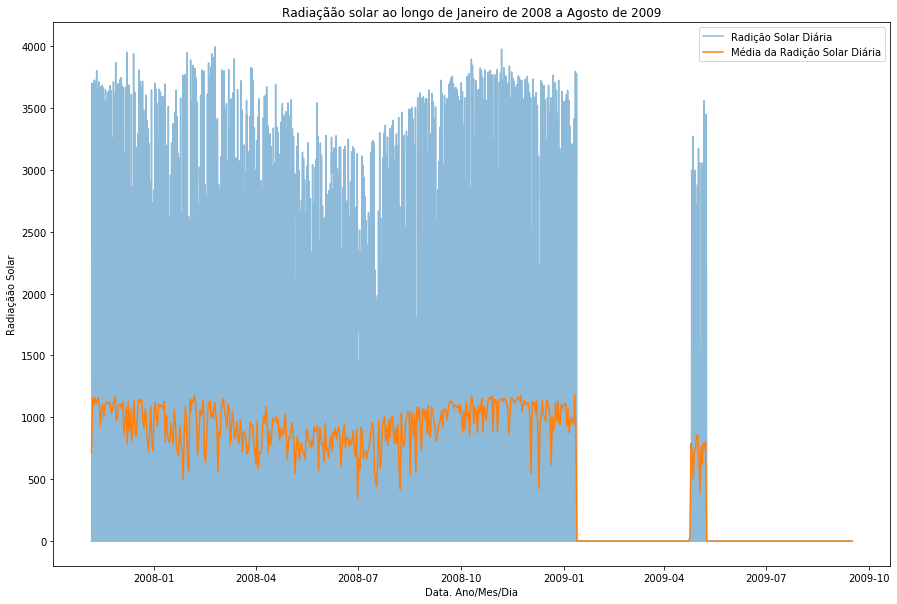

In [267]:
plt.figure(figsize=(15,10))

plt.plot(df1.mdct, df1.gbrd, alpha=0.5, label='Radição Solar Diária')
plt.plot(df1.resample('d', on='mdct').gbrd.mean(), label='Média da Radição Solar Diária')

plt.title('Radiaçãão solar ao longo de Janeiro de 2008 a Agosto de 2009')
plt.xlabel('Data. Ano/Mes/Dia')
plt.ylabel('Radiaçãão Solar')

plt.legend()
plt.show()

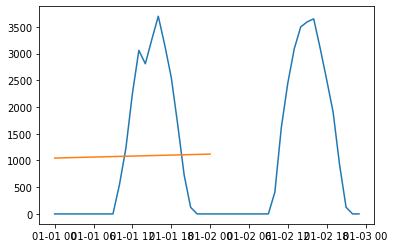

In [260]:
resample_day_df = df1['2008-01-01':'2008-01-02']
plt.plot(resample_day_df.mdct, resample_day_df.gbrd)
plt.plot(resample_day_df.resample('d', on='mdct').gbrd.mean())
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [259]:
resample_day_df.resample('d', on='mdct').mean()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,
2008-01-01,0.0,532.554167,532.779167,532.475000,1045.692792,16.633333,9.679167,17.0875,10.291667,16.050000,9.033333,26.291667,29.083333,23.666667,0.834783,63.625000,2.362500
2008-01-02,0.0,532.979167,492.108333,491.795833,1119.644958,16.850000,7.862500,16.2125,7.754167,15.233333,6.454167,20.625000,20.375000,16.083333,1.079167,65.416667,2.895833
